In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv(r"C:\Users\Khalil.hasanov\Desktop\my theis\churn30 thesis sample.csv")


In [4]:
df["churn30"].value_counts()

churn30
0    7237
1    2763
Name: count, dtype: int64

In [5]:
df_bonus_segment = pd.get_dummies(df["bonus_segment"])

df_bonus_segment= df_bonus_segment.replace({False: 0,True: 1})
df_bonus_segment.head()

,Million_bonus,Retention_bonus2,Welcome+Retention2_bonus,Welcome_bonus,no_bonus
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,1,0,0,0,0
4,1,0,0,0,0


In [6]:
df_source_group = pd.get_dummies(df["source_group"])

df_source_group= df_source_group.replace({False: 0,True: 1})
df_source_group.head()

,Apple Search Ads,Facebook Ads,Google Ads,Influencers,MilliON,Organic,Others,QR_code,Referral,SMS,landing_page
0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0


In [7]:
df_tenure_range = pd.get_dummies(df["tenure_range"])

df_tenure_range= df_tenure_range.replace({False: 0,True: 1})
df_tenure_range.head()

,120-180day,180-270day,270day+,31-60day,60-90day,90-120day
0,0,0,1,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [8]:
df_app_churn=df[["app_removed","churn30"]]
df_app_churn.head()

,app_removed,churn30
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0


In [9]:
# Assuming df is your dataframe
columns_to_remove = ["bonus_segment", "source_group", "tenure_range", "churn30", "app_removed"]
df_prepare_scale = df.drop(columns=columns_to_remove)

# Scale the data
scaler = StandardScaler()
df_scaled_values = scaler.fit_transform(df_prepare_scale)

# Create a DataFrame with scaled values and original column names
df_scaled = pd.DataFrame(df_scaled_values, columns=df_prepare_scale.columns)
df_scaled.head()




,act_days_30day,act_days_90day,act_days_180day,amount_30_W2W_in,tr_count_30_W2W_in,amount_30_W2W_out,tr_count_30_W2W_out,amount_30_C2W,tr_count_30_C2W,amount_30_W2C,...,amount_180_PB,tr_count_180_PB,amount_180_EntrPay,tr_count_180_EntrPay,amount_180_IN,tr_count_180_IN,amount_180_OUT,tr_count_180_OUT,amount_180_QR,tr_count_180_QR
0,0.185039,-0.286303,-0.108502,-0.044824,0.015810,-0.046291,-0.088163,-0.203114,-0.290289,-0.162790,...,0.822033,0.492527,-0.027157,-0.03659,-0.075470,-0.034525,-0.071619,-0.044212,0.253660,0.42781
1,-0.684098,-0.778318,0.019956,-0.044728,-0.019911,-0.045511,-0.033590,-0.199208,-0.226753,-0.165815,...,-0.111390,-0.141764,-0.027157,-0.03659,-0.089335,-0.043844,-0.084440,0.066563,-0.086394,-0.16699
2,-0.684098,-0.040296,-0.622334,-0.045303,-0.091354,-0.046926,-0.088163,-0.207021,-0.353825,-0.165815,...,-0.111390,-0.141764,-0.027157,-0.03659,-0.096025,-0.127710,-0.091165,-0.228836,-0.086394,-0.16699
3,-0.828955,-0.778318,-0.558105,-0.045303,-0.091354,-0.047218,-0.197310,-0.207021,-0.353825,-0.165815,...,-0.111390,-0.141764,-0.027157,-0.03659,-0.095314,-0.118392,-0.091136,-0.210374,-0.086394,-0.16699
4,-0.394386,-0.696316,-0.365418,-0.045303,-0.091354,-0.047218,-0.197310,0.655428,0.345070,0.485190,...,-0.111390,-0.141764,-0.027157,-0.03659,-0.090075,-0.071799,-0.088961,-0.210374,-0.086394,-0.16699


In [10]:
combined_df = pd.concat([df_bonus_segment, df_source_group, df_tenure_range, df_scaled, df_app_churn], axis=1)

# Print the combined DataFrame
print(combined_df.head())

   Million_bonus  Retention_bonus2  Welcome+Retention2_bonus  Welcome_bonus  \
0              0                 0                         0              0   
1              0                 0                         0              0   
2              0                 0                         0              0   
3              1                 0                         0              0   
4              1                 0                         0              0   

   no_bonus  Apple Search Ads  Facebook Ads  Google Ads  Influencers  MilliON  \
0         1                 0             0           1            0        0   
1         1                 0             0           0            0        0   
2         1                 0             0           1            0        0   
3         0                 0             0           0            0        0   
4         0                 0             0           0            0        0   

   ...  amount_180_EntrPay  tr_count_1

In [13]:
# Separate features and target variable
X = combined_df.drop('churn30', axis=1)
y = combined_df['churn30']

# Apply SMOTE to oversample the minority class
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['churn30'])], axis=1)

print("Original class distribution:")
print(y.value_counts())

print("\nResampled class distribution after SMOTE:")
print(y_resampled.value_counts())

print("\nResampled DataFrame:")
print(df_resampled)

Original class distribution:
churn30
0    7237
1    2763
Name: count, dtype: int64

Resampled class distribution after SMOTE:
churn30
0    7237
1    7237
Name: count, dtype: int64

Resampled DataFrame:
       Million_bonus  Retention_bonus2  Welcome+Retention2_bonus  \
0                  0                 0                         0   
1                  0                 0                         0   
2                  0                 0                         0   
3                  1                 0                         0   
4                  1                 0                         0   
...              ...               ...                       ...   
14469              0                 0                         0   
14470              0                 0                         0   
14471              0                 0                         0   
14472              0                 0                         0   
14473              0                 0            

In [14]:
svc = SVC(probability=True)
clf = LogisticRegression(solver='liblinear')
cld = DecisionTreeClassifier()
clc = RandomForestClassifier()

In [20]:
# Get all column names except "churn30"
all_columns_except_churn30 = df_resampled.columns[combined_df.columns != 'churn30']

# Rename the array as "features"
features = all_columns_except_churn30

# Print the features array
print(features)

Index(['Million_bonus', 'Retention_bonus2', 'Welcome+Retention2_bonus',
       'Welcome_bonus', 'no_bonus', 'Apple Search Ads', 'Facebook Ads',
       'Google Ads', 'Influencers', 'MilliON',
       ...
       'tr_count_180_PB', 'amount_180_EntrPay', 'tr_count_180_EntrPay',
       'amount_180_IN', 'tr_count_180_IN', 'amount_180_OUT',
       'tr_count_180_OUT', 'amount_180_QR', 'tr_count_180_QR', 'app_removed'],
      dtype='object', length=104)


In [21]:

clc.fit(df_resampled[features], df_resampled['churn30'])

LogisticRegression(solver='liblinear')

In [31]:
svc.fit(combined_df[features], combined_df['churn30'])

SVC(probability=True)

In [32]:
cld.fit(combined_df[features], combined_df['churn30'])

DecisionTreeClassifier()

In [41]:
clf.fit(combined_df[features], combined_df['churn30'])


LogisticRegression(solver='liblinear')

In [23]:
# Create feature variable
X = df_resampled.drop('churn30', axis=1)

# Create target variable
y =  df_resampled['churn30']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [24]:
len(X_train)


10131

In [25]:
len(X_test)

4343

Accuracy:  0.7920792079207921
Precision:  0.7429943955164131
Recall:  0.8767123287671232


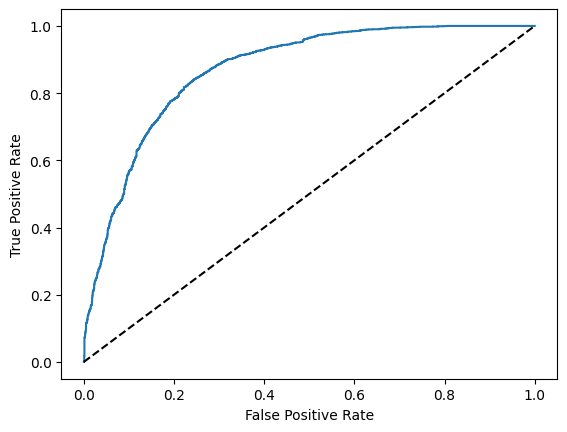

roc:  0.8696213131111215
f1:  0.8043336944745396
[[1584  642]
 [ 261 1856]]


In [43]:
# Fit to the training data/RandomForestClassifier
clf.fit(X_train, y_train)

# Compute accuracy
print("Accuracy: ",clf.score(X_test, y_test))
y_pred_random = clf.predict(X_test)
print("Precision: ",precision_score(y_test, y_pred_random))
print("Recall: ",recall_score(y_test, y_pred_random))
y_pred_prob_random = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_random)
# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()
# Print the AUC
print("roc: ", roc_auc_score(y_test, y_pred_prob_random))
print("f1: ",f1_score(y_test, y_pred_random))
print(confusion_matrix(y_test, y_pred_random))

0.8544784711029243
0.8455095393206142
0.858290033065659


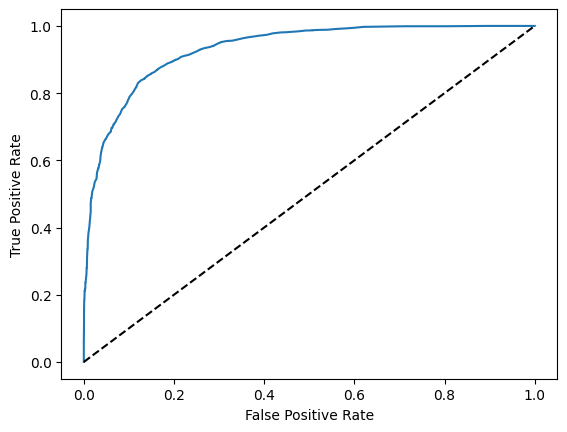

0.931940488604422
0.851851851851852
[[1894  332]
 [ 300 1817]]


In [44]:
# Fit to the training data/LogisticRegression
clc.fit(X_train, y_train)

# Compute accuracy
print(clc.score(X_test, y_test))
y_pred_logistic = clc.predict(X_test)
print(precision_score(y_test, y_pred_logistic))
print(recall_score(y_test, y_pred_logistic))
y_pred_prob_logistic = clc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_logistic)
# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()
# Print the AUC
print(roc_auc_score(y_test, y_pred_prob_logistic))
print(f1_score(y_test, y_pred_logistic))
print(confusion_matrix(y_test, y_pred_logistic))

0.7950725305088648
0.7797537619699042
0.807746811525744


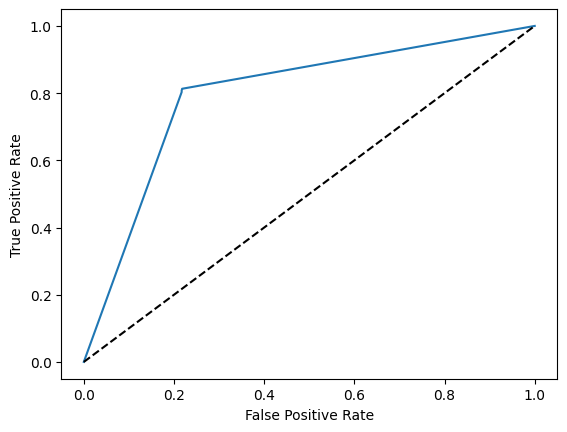

0.7968178706496548
0.7935034802784223
[[1743  483]
 [ 407 1710]]


In [45]:
# Fit to the training data/DecisionTreeClassifier
cld.fit(X_train, y_train)

# Compute accuracy
print(cld.score(X_test, y_test))
y_pred_decision = cld.predict(X_test)
print(precision_score(y_test, y_pred_decision))
print(recall_score(y_test, y_pred_decision))
y_pred_prob_decision = cld.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_decision)
# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()
# Print the AUC
print(roc_auc_score(y_test, y_pred_prob_decision))
print(f1_score(y_test, y_pred_decision))
print(confusion_matrix(y_test, y_pred_decision))

0.7819479622380843
0.7326968973747017
0.870099196976854


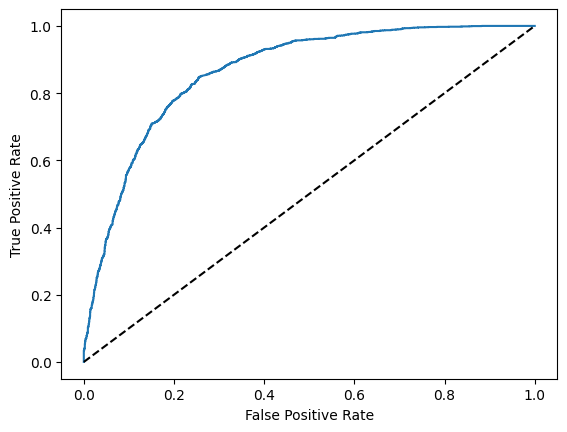

0.8650540420444431
0.7955085294752754
[[1554  672]
 [ 275 1842]]


In [46]:
# Fit to the training data/SVC
svc.fit(X_train, y_train)

# Compute accuracy
print(svc.score(X_test, y_test))
y_pred_svc =svc.predict(X_test)
print(precision_score(y_test, y_pred_svc))
print(recall_score(y_test, y_pred_svc))
y_pred_prob_svc = svc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_svc)
# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()
# Print the AUC
print(roc_auc_score(y_test, y_pred_prob_svc))
print(f1_score(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))